# Análisis Descriptivo e Inferencial de Datos

Canton a analizar: Milagro -> 0910

Provincia: Guayas

Ciclo: 2019-2020

## Analisis general de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f
from scipy.stats import chi2_contingency
from scipy.stats import normaltest
import statsmodels.api as sm
import matplotlib.pyplot as plt
#conda activate p2-statistics

![dic](dic.png)


In [2]:
micro_2 = pd.read_csv('SBAC20_micro_272370_20210121_CSV.csv', sep=';')
micro_2.drop('codigo', axis=1, inplace=True)

variables = ['financiamiento', 'tp_sexo', 'tp_area', 'isec', 'inev', 'pes', 'imat',
       'ilyl', 'icn', 'ies', 'nl_imat', 'nl_ilyl', 'nl_icn', 'nl_ies',
       'nl_inev']

for variable in variables:
    print(f"Unique values of {variable}:")
    print(micro_2[variable].unique())
    print()

C:\Users\HOME\AppData\Local\Temp\ipykernel_18580\1851611013.py:1: DtypeWarning: Columns (2,22,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  micro_2 = pd.read_csv('SBAC20_micro_272370_20210121_CSV.csv', sep=';')


Unique values of financiamiento:
[     1      3      2 999999]

Unique values of tp_sexo:
[1 2]

Unique values of tp_area:
[ 2  1 98]

Unique values of isec:
['-,29756' '1,98499' '-1,12751' ... ',73235' '-1,34887' ',2267']

Unique values of inev:
['7,3' '7,22' '7,38' '7,27' '6,69' '7,66' '7,21' '6,92' '7,25' '7,75' '7'
 '6,83' '7,12' '8,32' '6,87' '6,72' '7,19' '6,75' '6,68' '7,06' '7,14'
 '7,15' '7,33' '7,45' '7,36' '7,46' '6,58' '7,02' '7,17' '7,54' '8,74'
 '6,8' '7,05' '999999' '6,33' '7,63' '6,16' '7,64' '7,41' '6,77' '8,85'
 '6,36' '6,88' '6,55' '7,31' '6,85' '7,28' '7,09' '7,08' '6,73' '6,76'
 '7,4' '7,04' '7,59' '7,18' '7,78' '6,53' '7,44' '6,98' '7,74' '6,62'
 '6,56' '7,24' '6,66' '6,37' '6,5' '7,56' '7,77' '6,74' '6,46' '7,61'
 '7,29' '7,93' '6,95' '6,93' '6,78' '7,34' '6,81' '6,99' '7,62' '7,39'
 '7,55' '6,64' '8,08' '7,96' '6,44' '7,49' '7,23' '6,1' '7,47' '7,73'
 '7,26' '7,48' '7,7' '6,57' '6,86' '6,49' '6,71' '7,2' '7,07' '8,05'
 '7,01' '6,94' '7,16' '6,31' '6,08' '6,63' '

In [3]:
micro= micro_2

# Milagro -> 910
# Guayaquil -> 901
micro_milagro = micro[micro["id_cant"] == 910]

columns_to_drop = ['ciclo', 'amie', 'nm_regi', 'es_regeva', 'id_zona', 'id_dist', 'id_circ', 'id_prov', 'id_cant', 'id_parr']
micro_milagro.drop(columns_to_drop, axis=1, inplace=True)

to_drop = ["tp_sost", "na_eano", "etnibbe", 'discapacidad', 'quintil', 'poblacion', 'estado', "deshonestidad", 
            "isec", "nl_imat", "nl_ilyl", "nl_icn", "nl_ies", "nl_inev"] # "inev", "pes", "imat", "ilyl", "icn", "ies", 
micro_milagro.drop(to_drop, axis=1, inplace=True)
micro_milagro.head()

C:\Users\HOME\AppData\Local\Temp\ipykernel_18580\2602406828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_milagro.drop(columns_to_drop, axis=1, inplace=True)
C:\Users\HOME\AppData\Local\Temp\ipykernel_18580\2602406828.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_milagro.drop(to_drop, axis=1, inplace=True)


,financiamiento,tp_sexo,tp_area,inev,pes,imat,ilyl,icn,ies
53978,2,2,1,"7,31",650,"6,63","7,35","7,22","8,05"
54304,2,2,1,"7,67",720,"5,88","8,24","8,22","8,35"
54305,2,1,1,"8,23",765,"8,13","8,06","8,22","8,5"
54306,2,2,1,"6,92",610,"6,25","7,53","6,31","7,6"
54307,2,1,1,"7,75",705,7,"8,06","7,89","8,05"


In [4]:
micro_milagro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 53978 to 272030
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   financiamiento  4909 non-null   int64 
 1   tp_sexo         4909 non-null   int64 
 2   tp_area         4909 non-null   int64 
 3   inev            4909 non-null   object
 4   pes             4909 non-null   int64 
 5   imat            4909 non-null   object
 6   ilyl            4909 non-null   object
 7   icn             4909 non-null   object
 8   ies             4909 non-null   object
dtypes: int64(4), object(5)
memory usage: 383.5+ KB


# Conversiones de tipos de datos

In [8]:
variables = ['financiamiento', 'tp_sexo', 'tp_area', 'inev', 'pes', 'imat',
       'ilyl', 'icn', 'ies']

micro_milagro['financiamiento'] = micro_milagro['financiamiento'].replace({
    1: 'Publico', 
    2: 'Privado', 
    3: 'Mixto', 
    999999:np.nan
    })

micro_milagro['tp_sexo'] = micro_milagro['tp_sexo'].replace({
    1: 'Mujer', 
    2: 'Hombre', 
    999999:np.nan
    })

micro_milagro['tp_area'] = micro_milagro['tp_area'].replace({
    1: 'Rural', 
    2: 'Urbana', 
    98: 'Exterior',
    999999:np.nan
    })

micro_milagro['inev'] = micro_milagro['inev'].replace(',', '.', regex=True)
micro_milagro['inev'] = micro_milagro['inev'].replace('999999', np.nan, regex=True).astype('double')
micro_milagro['inev'] = micro_milagro['inev'].replace({999999:np.nan})

micro_milagro['pes'] = micro_milagro['pes'].replace({999999:np.nan})

micro_milagro['imat'] = micro_milagro['imat'].replace(',', '.', regex=True)
micro_milagro['imat'] = micro_milagro['imat'].replace('999999', np.nan, regex=True).astype('double')
micro_milagro['imat'] = micro_milagro['imat'].replace({999999:np.nan})

micro_milagro['ilyl'] = micro_milagro['ilyl'].replace(',', '.', regex=True)
micro_milagro['ilyl'] = micro_milagro['ilyl'].replace('999999', np.nan, regex=True).astype('double')
micro_milagro['ilyl'] = micro_milagro['ilyl'].replace({999999:np.nan})

micro_milagro['icn'] = micro_milagro['icn'].replace(',', '.', regex=True)
micro_milagro['icn'] = micro_milagro['icn'].replace('999999', np.nan, regex=True).astype('double')
micro_milagro['icn'] = micro_milagro['icn'].replace({999999:np.nan})

micro_milagro['ies'] = micro_milagro['ies'].replace(',', '.', regex=True)
micro_milagro['ies'] = micro_milagro['ies'].replace('999999', np.nan, regex=True).astype('double')
micro_milagro['ies'] = micro_milagro['ies'].replace({999999:np.nan})

for variable in variables:
    print(f"Unique values of {variable}:")
    print(micro_milagro[variable].unique())
    print()

Unique values of financiamiento:
['Privado' 'Publico' nan]

Unique values of tp_sexo:
['Hombre' 'Mujer']

Unique values of tp_area:
['Rural' 'Urbana']

Unique values of inev:
[ 7.31  7.67  8.23  6.92  7.75  7.58  7.42  7.27  6.9   6.3   7.05  8.29
  8.51  6.67  7.5   7.72  6.68  8.99  6.65  7.17  7.46  6.98  6.62  7.69
  6.51  7.06  6.91  6.85  7.    6.6   7.4   6.66  6.56  6.47  6.64  6.71
  6.84  7.26  7.33  6.88  7.38  7.66  6.72  7.57  7.2   6.75  7.16  6.93
  7.14  7.62  6.55  8.14  6.99  7.18  6.53  6.57  7.68  6.31  7.32  7.85
  7.64  7.39  7.11  6.49  6.54  5.86  7.47  7.53  7.37  6.97  7.07  7.44
  8.27  8.31  7.09  7.1   6.82  7.54  6.76  7.08  7.28  6.77  7.63  7.88
  7.77  7.03  7.34  7.78  6.81  7.24  7.04  7.36  7.74  7.41  7.22  7.19
  6.96  6.94  6.2   6.74  7.51  6.52  5.63  6.46  8.11  6.83  7.01  8.09
  6.95  7.73  6.78  6.26  7.96  7.52  8.06  9.11  8.01  7.55  8.75  7.71
  8.34  8.19  7.98  9.28  7.95  8.3   9.77  8.2   8.26  8.02  9.73  8.53
  8.18  9.35  9.78  8.

C:\Users\HOME\AppData\Local\Temp\ipykernel_18580\3710784556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_milagro['financiamiento'] = micro_milagro['financiamiento'].replace({
C:\Users\HOME\AppData\Local\Temp\ipykernel_18580\3710784556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micro_milagro['tp_sexo'] = micro_milagro['tp_sexo'].replace({
C:\Users\HOME\AppData\Local\Temp\ipykernel_18580\3710784556.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [9]:
micro_milagro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 53978 to 272030
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   financiamiento  3559 non-null   object 
 1   tp_sexo         4909 non-null   object 
 2   tp_area         4909 non-null   object 
 3   inev            3549 non-null   float64
 4   pes             4746 non-null   float64
 5   imat            3549 non-null   float64
 6   ilyl            3549 non-null   float64
 7   icn             3549 non-null   float64
 8   ies             3549 non-null   float64
dtypes: float64(6), object(3)
memory usage: 383.5+ KB


In [10]:
micro_milagro.describe()

,inev,pes,imat,ilyl,icn,ies
count,3549.000000,4746.000000,3549.000000,3549.000000,3549.000000,3549.000000
mean,7.466534,661.741677,7.504517,7.249242,7.540107,7.567315
std,0.809970,88.793552,1.021010,1.138827,0.787334,0.904755
min,5.630000,410.000000,4.380000,4.000000,4.920000,4.000000
25%,6.920000,605.000000,7.000000,6.330000,7.110000,7.000000
50%,7.300000,640.000000,7.380000,7.180000,7.440000,7.450000
75%,7.790000,685.000000,7.940000,7.880000,7.890000,8.050000
max,10.000000,1000.000000,10.000000,10.000000,10.000000,10.000000


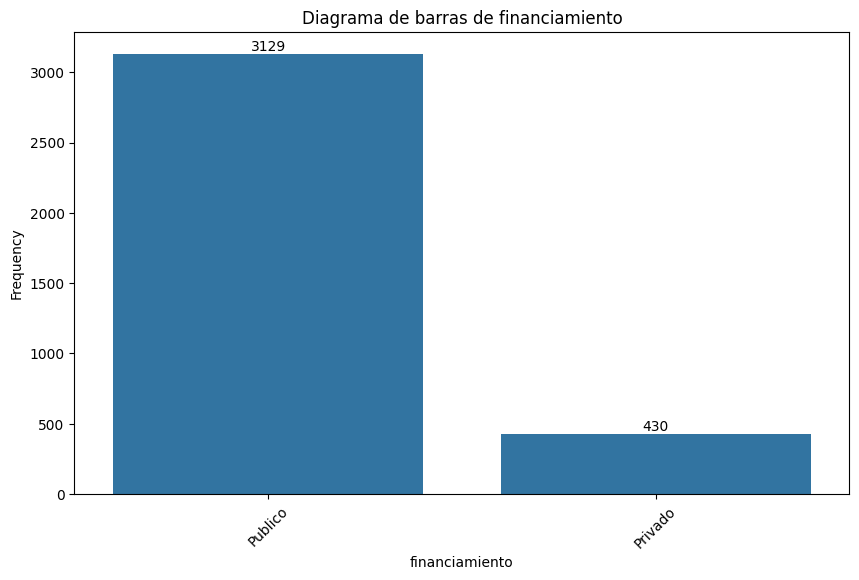

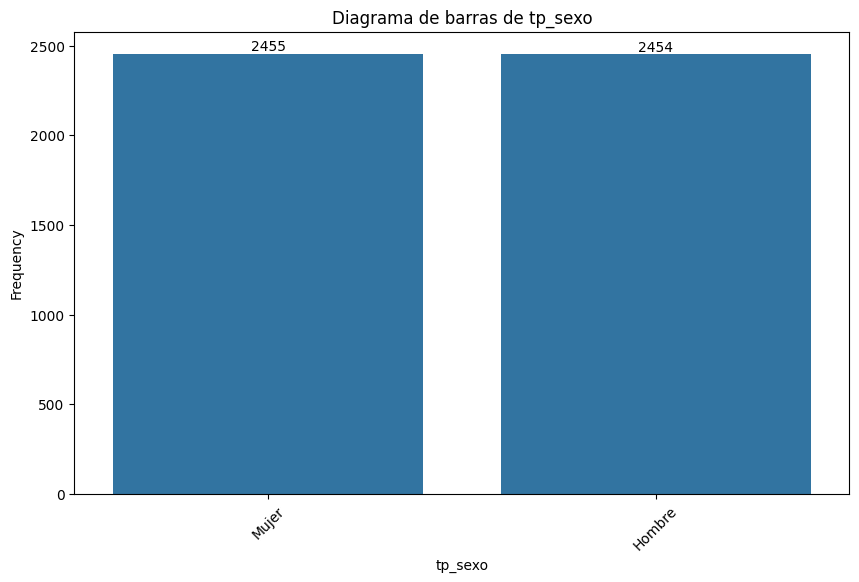

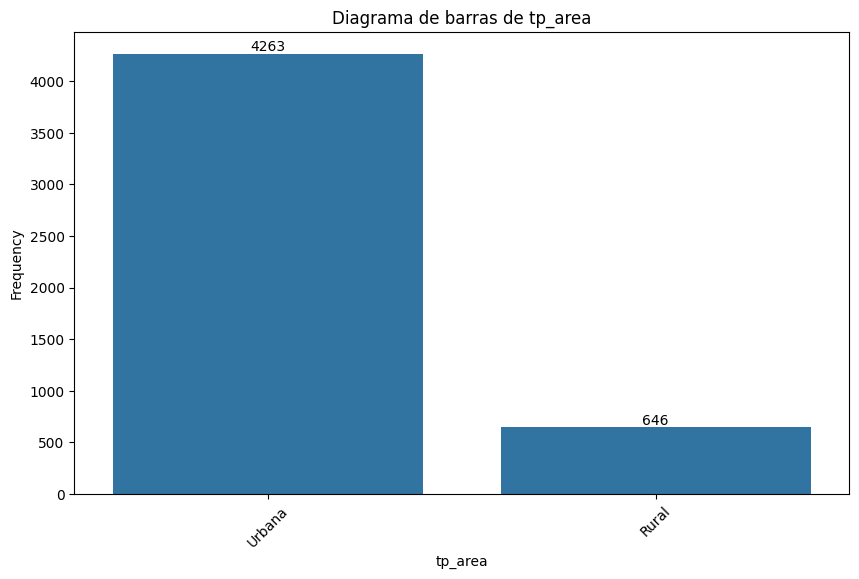

In [11]:
# Obtener las columnas de tipo object
object_columns = micro_milagro.select_dtypes(include='object').columns

for column in object_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=micro_milagro[column].value_counts().index, y=micro_milagro[column].value_counts().values)
    plt.title(f'Diagrama de barras de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    for i, v in enumerate(micro_milagro[column].value_counts().values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    plt.show()


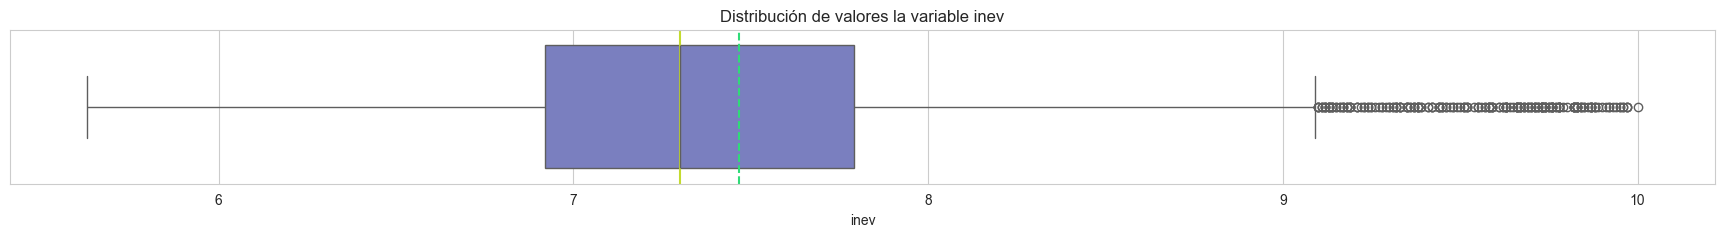

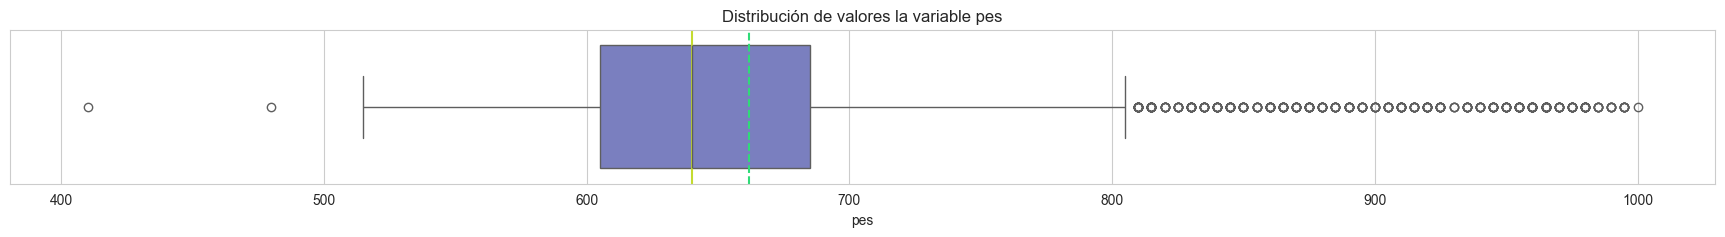

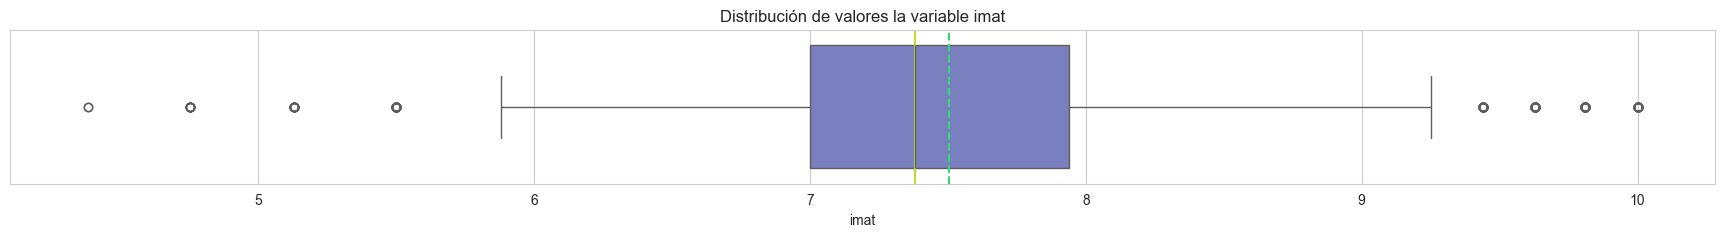

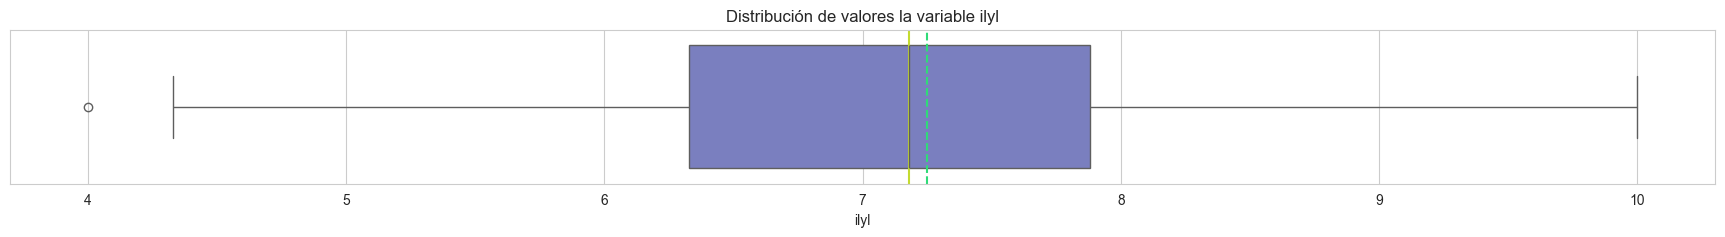

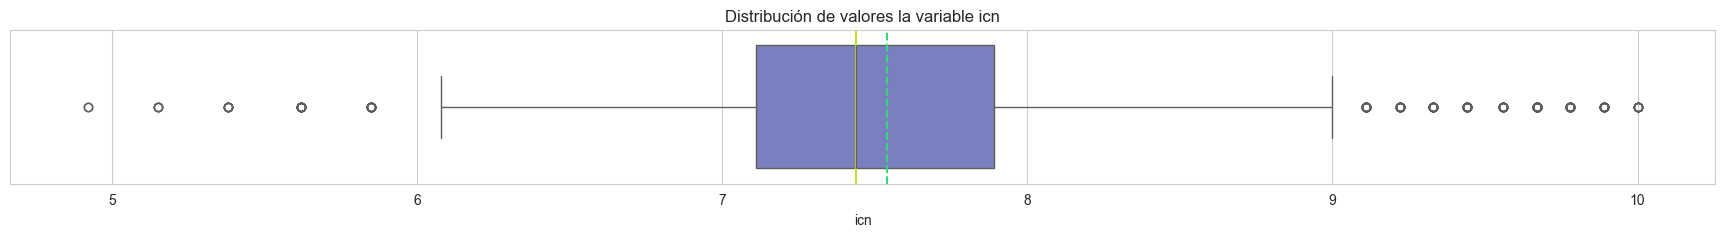

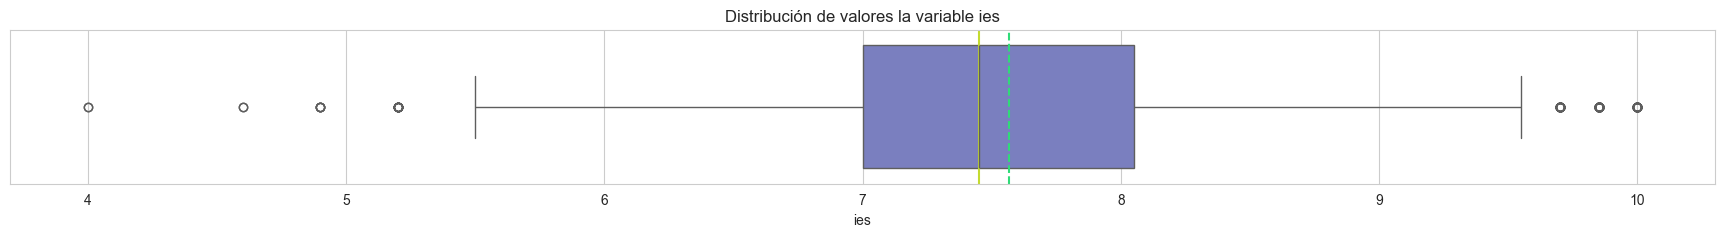

In [12]:
def boxplot(value):
    data = micro_milagro.columns
    column_data = micro_milagro[data[value]]
    if column_data.dtype in [np.int64, np.float64]:
        sns.set_style('whitegrid')
        fig, ax = plt.subplots(1, 1, figsize=(22, 2))
        sns.boxplot(x=column_data, color='#6E75CA', ax=ax)
        
        # Calculate and draw the mean
        mean = column_data.mean()
        ax.axvline(mean, color='#30db78', linestyle='--')
        #ax.text(mean, 0.75, 'Mean: {:.2f}'.format(mean), va='center', ha='center', backgroundcolor='w')
        
        # Calculate and draw the median
        median = column_data.median()
        ax.axvline(median, color='#c4db30', linestyle='-')
        #ax.text(median, 0.85, 'Median: {:.2f}'.format(median), va='center', ha='center', backgroundcolor='w')
        
        plt.title('Distribución de valores la variable '+data[value])
        plt.xlabel(data[value])     
        plt.show()
        fig.tight_layout()
         

dataTypes=micro_milagro.dtypes
for i in range(dataTypes.size):
    boxplot(i)

In [13]:
micro_milagro.columns

Index(['financiamiento', 'tp_sexo', 'tp_area', 'inev', 'pes', 'imat', 'ilyl',
       'icn', 'ies'],
      dtype='object')

# Análisis inferencial

## Prueba hipotesis: media de la nota de examen de grado del cantón Milagro (inev)

H0 = La media de la nota de examen de grado del cantón Milagro es igual a 7

H1 = La media de la nota de examen de grado del cantón Milagro es diferente a 7

Supuestos: Normalidad, n es grande, varianza desconocida


In [15]:
# Nivel de significancia
nivel_significancia = 0.05

# Hipótesis nula: La media de la nota de examen de grado del cantón Milagro es igual a 7
# Hipótesis alternativa: La media de la nota de examen de grado del cantón Milagro es diferente a 7

# Realizamos la prueba t de Student para una muestra
nota_grado = micro_milagro['inev'].dropna().tolist()

t_stat, p_valor = stats.ttest_1samp(nota_grado, 7)

# Imprimimos los resultados
print("Estadístico t:", t_stat)
print("Valor p (dos colas):", p_valor)

# Interpretación del resultado
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")



Estadístico t: 34.3136865088293
Valor p (dos colas): 4.369705464384327e-223
Rechazamos la hipótesis nula


In [16]:
print(micro_milagro['financiamiento'].count())
micro_milagro['financiamiento'].value_counts()

3559


financiamiento
Publico    3129
Privado     430
Name: count, dtype: int64

## Prueba hipotesis: proporción del tipo de financiamiento de la institución educativa

H0 = La proporción de instituciones educativas privadas es igual a 0.017

H1 = La proporción de instituciones educativas privadas es menor a 0.017

Supuestos: Normalidad, n es grande

In [17]:
privadas = 120  # Número de instituciones privadas
total_instituciones = 6948   # Tamaño de la población total

# Valor específico para la proporción bajo la hipótesis nula
prop_value = round(privadas/total_instituciones, 3)
print("Proporción:", prop_value)

Proporción: 0.017


In [18]:
# Nivel de significancia
nivel_significancia = 0.05

# Prueba de proporciones z
count = privadas
nobs = total_instituciones

# Realizar la prueba de proporciones z
z_stat, p_valor = proportions_ztest(count, nobs=nobs, value=prop_value, alternative='smaller')

# Imprimir resultados
print("Estadístico Z:", z_stat)
print("Valor p:", p_valor)

# Interpretación del resultado
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Estadístico Z: 0.1734895913674053
Valor p: 0.5688666956431634
No podemos rechazar la hipótesis nula


## Prueba hipotesis: diferencia de medias de la nota de examen de grado entre hombres y mujeres

H0 = La media de la nota de examen de grado de hombres es igual a la de mujeres

H1 = La media de la nota de examen de grado de hombres es diferente a la de mujeres

Supuestos: X1,X2 población normal e independientes 𝜎12,𝜎22 desconocido n1,n2 grande

In [19]:
hombres_inev = micro_milagro[micro_milagro['tp_sexo'] == 'Hombre']['inev'].dropna().tolist()
mujeres_inev = micro_milagro[micro_milagro['tp_sexo'] == 'Mujer']['inev'].dropna().tolist()

In [20]:
# Nivel de significancia
nivel_significancia = 0.05

# Realizamos la prueba t de Student para muestras independientes
t_stat, p_valor = stats.ttest_ind(hombres_inev, mujeres_inev)

# Imprimimos los resultados
print("Estadístico t:", t_stat)
print("Valor p:", p_valor)

# Interpretación del resultado
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Estadístico t: -0.8692519106847082
Valor p: 0.38476817443946676
No podemos rechazar la hipótesis nula


## Prueba hipotesis: diferencia de varianzas de la nota de examen de grado entre hombres y mujeres

H0 = La varianza de la nota de examen de grado de hombres es igual a la de mujeres

H1 = La varianza de la nota de examen de grado de hombres es mayor a la de mujeres

Supuestos: X1,X2 población normal e independientes 𝜎12,𝜎22 desconocido n1,n2 grande

In [21]:
# Nivel de significancia
nivel_significancia = 0.05

# Calculamos las varianzas de las muestras
var_hombres = np.var(hombres_inev, ddof=1)  # Usamos ddof=1 para calcular la varianza muestral no sesgada
var_mujeres = np.var(mujeres_inev, ddof=1)

# Realizamos la prueba F de Fisher
f_stat = var_hombres / var_mujeres

# Grados de libertad
dfn = len(hombres_inev) - 1
dfd = len(mujeres_inev) - 1

# Valor p de la prueba F
p_valor = 1 - f.cdf(f_stat, dfn, dfd)

# Imprimimos los resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_valor)

# Interpretación del resultado
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


Estadístico F: 1.0870534566732493
Valor p: 0.0394550411873793
Rechazamos la hipótesis nula


## Prueba hipotesis: independencia entre el tipo de financiamiento de la institución educativa y el área de asentamiento de la institución educativa

H0 = El tipo de financiamiento y el área de asentamiento de la institución educativa son independientes

H1 = El tipo de financiamiento y el área de asentamiento de la institución educativa no son independientes

Supuestos: Normalidad, n es grande

In [36]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(micro_milagro['financiamiento'], micro_milagro['tp_area'])

# Realizar la prueba chi-cuadrado de independencia
chi2_stat, p_valor, dof, expected = chi2_contingency(tabla_contingencia)

# Imprimir los resultados
print("Estadístico de chi-cuadrado:", chi2_stat)
print("Valor p:", p_valor)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:")
print(expected)

# Nivel de significancia
nivel_significancia = 0.05

# Interpretación del resultado
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

tabla_contingencia

Estadístico de chi-cuadrado: 5.585780373979122
Valor p: 0.01810686393286324
Grados de libertad: 1
Frecuencias esperadas:
[[  42.16633886  387.83366114]
 [ 306.83366114 2822.16633886]]
Rechazamos la hipótesis nula


tp_area,Rural,Urbana
financiamiento,,
Privado,28,402
Publico,321,2808


# Bondad de ajuste: Distribución binomial en el financiamiento de la institución educativa

H0 = La distribución de financiamiento de la institución educativa sigue una distribución binomial

H1 = La distribución de financiamiento de la institución educativa no sigue una distribución binomial

Supuestos: n debe ser grande, Mínimo 3 regiones, Por cada región, mínimo 5 observaciones

In [33]:
from scipy.stats import chisquare

# Obtener la columna 'financiamiento' y eliminar los valores NaN
financiamiento = micro_milagro['financiamiento'].dropna().tolist()

# Calcular el número total de observaciones
n = len(financiamiento)

# Contar las frecuencias de cada categoría
observed_counts = pd.Series(financiamiento).value_counts()

# Definir las probabilidades esperadas para una distribución binomial
p = 0.5  # Probabilidad de éxito para una distribución binomial
expected_counts = pd.Series({
    'Publico': n * p,
    'Privado': n * (1 - p)
})

# Realizar la prueba de chi-cuadrado
chi2_stat, p_value = chisquare(observed_counts, f_exp=expected_counts)

# Imprimir los resultados
print("Estadístico de chi-cuadrado:", chi2_stat)
print("Valor p:", p_value)

# Crear un DataFrame para la tabla de contingencia
contingency_table = pd.DataFrame({
    'Observado': observed_counts,
    'Esperado': expected_counts
})

# Imprimir la tabla de contingencia
print("\nTabla de Contingencia:")
print(contingency_table)


# Nivel de significancia
alpha = 0.05

# Imprimir la decisión basada en el valor p
if p_value < alpha:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")



Estadístico de chi-cuadrado: 2046.8111829165496
Valor p: 0.0

Tabla de Contingencia:
         Observado  Esperado
Publico       3129    1779.5
Privado        430    1779.5
Se rechaza la hipótesis nula


# Regresión lineal

x: inev (nota de examen de grado)

y: pes (nota parcial para la postulación a la ed. sup.)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3490.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:53:19   Log-Likelihood:                -19770.
No. Observations:                3549   AIC:                         3.954e+04
Df Residuals:                    3547   BIC:                         3.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.8626      9.894      8.274      0.0

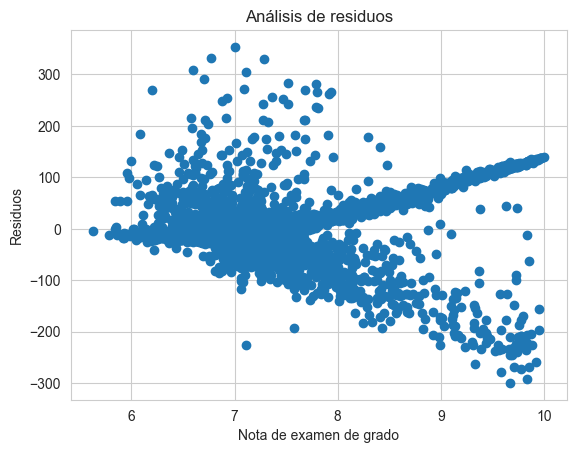

In [24]:
inev = micro_milagro['inev'].dropna().tolist()
pes = micro_milagro['pes'].dropna().tolist()

# Asumiendo que 'inev' y 'pes' son listas
longitud_inev = len(inev)
pes = pes[:longitud_inev]

X = sm.add_constant(inev)
modelo = sm.OLS(pes, X)
resultado = modelo.fit()
print(resultado.summary())

residuos = resultado.resid  # Obtiene los residuos del modelo
plt.scatter(inev, residuos)  # Gráfico de dispersión de los residuos
plt.xlabel('Nota de examen de grado')
plt.ylabel('Residuos')
plt.title('Análisis de residuos')
plt.show()
